### Context
- Airbnb, Inc. is an American vacation rental online marketplace company based in San Francisco, California, United States. Airbnb offers arrangements for lodging, primarily      homestays, or tourism experiences. The company does not own any of the real estate listings, nor does it host events; it acts as a broker, receiving commissions from each booking. 
Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way.

### Objective
- Imagine you are Data Scientist who would help find the price for lodging or homestays based on different attributes mentioned in their listings. Oh wait, what are listings? Listings can include written descriptions, photographs with captions, and a user profile where potential guests can get to know a bit about the hosts.And you are given the listings of one of the most popular cities in central Europe: Amsterdam.

- Now your job is to build a machine learning model that will automatically predict the price for lodging or homestays.
- Link to Dataset: https://www.kaggle.com/c/dphi-amsterdam-airbnb-data/data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('airbnb_data/airbnb_listing_train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12901 entries, 0 to 12900
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12901 non-null  int64  
 1   name                            12879 non-null  object 
 2   host_id                         12901 non-null  int64  
 3   host_name                       12893 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   12901 non-null  object 
 6   latitude                        12901 non-null  float64
 7   longitude                       12901 non-null  float64
 8   room_type                       12901 non-null  object 
 9   minimum_nights                  12901 non-null  int64  
 10  number_of_reviews               12901 non-null  int64  
 11  last_review                     11305 non-null  object 
 12  reviews_per_month               

In [3]:
df

id                                               name    host_id  \
0      11602914                Luxury home 100m2+garden in center!    3123809   
1      13289321                        East is where your home is!   10259430   
2      40779315    Amsterdam Central - LUXURY house in BUSY STREET  224969266   
3       7820311                         great appartment down town     693472   
4      27346603      Private room with canal view in peaceful area   41888346   
...         ...                                                ...        ...   
12896  20757739  Quiet stylish private room 15 mins to city  ce...   63932037   
12897   1055570  Beautiful, spacious apt. with great views @ IJ...    5813322   
12898  13178435                Great apartment de Pijp/Albert Cuyp   46370427   
12899  21963760           Stylish apartment in an amazing location    4895882   
12900  33726315                   Amsterdam Apartments First Floor  203460948   

       host_name  neighbourhood_group             neighbourhood  latitude  \
0      Marjolein                  NaN   De Pijp - Rivierenbuurt  52.35368   
1            Ana                  NaN                  Oud-Oost  52.35728   
2           Mark                  NaN              Centrum-West  52.37582   
3          Ayden                  NaN                Westerpark  52.37792   
4         Alissa                  NaN                Westerpark  52.38051   
...          ...                  ...                       ...       ...   
12896   Michelle                  NaN    De Baarsjes - Oud-West  52.37194   
12897       Rens                  NaN  IJburg - Zeeburgereiland  52.36263   
12898   Francien                  NaN   De Pijp - Rivierenbuurt  52.35719   
12899       Olaf                  NaN                      Zuid  52.34855   
12900       City                  NaN              Centrum-Oost  52.35865   

       longitude        room_type  minimum_nights  number_of_reviews  \
0        4.90177  Entire home/apt               3                 13   
1        4.92052  Entire home/apt               4                 14   
2        4.89850  Entire home/apt               2                  9   
3        4.87300  Entire home/apt               3                 42   
4        4.87493     Private room               2                 89   
...          ...              ...             ...                ...   
12896    4.84965  Entire home/apt               1                  1   
12897    4.98031  Entire home/apt               7                238   
12898    4.90009  Entire home/apt               3                 15   
12899    4.85105  Entire home/apt               2                 11   
12900    4.89795       Hotel room               5                  1   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      15-02-2020               0.27                               1   
1      19-06-2019               0.29                               1   
2      16-03-2020               1.65                               1   
3      17-02-2020               0.72                               1   
4      26-02-2020               4.02                               1   
...           ...                ...                             ...   
12896  13-09-2017               0.03                               1   
12897  25-02-2020               2.75                               1   
12898  07-10-2018               0.31                               1   
12899  28-04-2019               0.37                               1   
12900  17-02-2020               0.26                              11   

       availability_365  price  
0                     0    220  
1                     0    110  
2                     7    100  
3                     0    130  
4                    24     90  
...                 ...    ...  
12896                88     65  
12897               357    160  
12898                 0    180  
12899                 0    136  
12900               36

In [4]:
# Check for missing values
df.isna().sum()

id                                    0
name                                 22
host_id                               0
host_name                             8
neighbourhood_group               12901
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
last_review                        1596
reviews_per_month                  1596
calculated_host_listings_count        0
availability_365                      0
price                                 0
dtype: int64

In [5]:
# Check for unique values 
for var in df.columns:
    print(f"{df[var].name} : {df[var].unique()}")

id : [11602914 13289321 40779315 ... 13178435 21963760 33726315]
name : ['Luxury home 100m2+garden in center!' 'East is where your home is!'
 'Amsterdam Central - LUXURY house in BUSY STREET' ...
 'Great apartment de Pijp/Albert Cuyp'
 'Stylish apartment in an amazing location'
 'Amsterdam Apartments First Floor']
host_id : [  3123809  10259430 224969266 ...   5813322  46370427   4895882]
host_name : ['Marjolein' 'Ana' 'Mark' ... 'Ifigenia' 'Rutger & Mariella' 'Haych']
neighbourhood_group : [nan]
neighbourhood : ['De Pijp - Rivierenbuurt' 'Oud-Oost' 'Centrum-West' 'Westerpark'
 'Centrum-Oost' 'De Baarsjes - Oud-West' 'Noord-West' 'Bos en Lommer'
 'De Aker - Nieuw Sloten' 'Oostelijk Havengebied - Indische Buurt'
 'Bijlmer-Centrum' 'Watergraafsmeer' 'Slotervaart' 'Osdorp' 'Zuid'
 'Geuzenveld - Slotermeer' 'Oud-Noord' 'Buitenveldert - Zuidas'
 'IJburg - Zeeburgereiland' 'Noord-Oost' 'Gaasperdam - Driemond'
 'Bijlmer-Oost']
latitude : [52.35368 52.35728 52.37582 ... 52.34615 52.35023 52.36

In [6]:
# since there is no value in neighbourhood_group, id we can remove it
df.drop(['neighbourhood_group'],axis=1,inplace=True)
df.drop(['id'],axis=1,inplace=True)

In [7]:
#Handle missing values
df['name'].fillna('Unknown',inplace=True)
df['host_name'].fillna('Unknown',inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)
df['last_review'].fillna('1970-01-01', inplace=True)

In [8]:
#convert 'last_review' to datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

#Extract date features from 'last_review'
df['last_review_year'] = df['last_review'].dt.year
df['last_review_month'] = df['last_review'].dt.month
df['last_review_day'] = df['last_review'].dt.day

/tmp/ipykernel_6970/152159923.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')


In [9]:
df.drop(['last_review'], axis=1, inplace=True)
#df.drop(['name','host_name'],axis=1,inplace=True)

In [10]:
categorical = [var for var in df.columns if df[var].dtype == 'O']
numerical = [var for var in df.columns if df[var].dtype != 'O']
print(f"categorical : {categorical}")
print(f"numerical : {numerical}")

categorical : ['name', 'host_name', 'neighbourhood', 'room_type']
numerical : ['host_id', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'price', 'last_review_year', 'last_review_month', 'last_review_day']


In [11]:
round(df.describe(),2)

host_id  latitude  longitude  minimum_nights  number_of_reviews  \
count  1.290100e+04  12901.00   12901.00        12901.00           12901.00   
mean   6.321700e+07     52.37       4.89            3.54              24.80   
std    8.010814e+07      0.02       0.04           15.15              53.41   
min    3.592000e+03     52.29       4.76            1.00               0.00   
25%    8.948269e+06     52.36       4.86            2.00               2.00   
50%    2.711601e+07     52.36       4.89            2.00               9.00   
75%    8.337686e+07     52.38       4.91            3.00              24.00   
max    3.490175e+08     52.43       5.02         1001.00             843.00   

       reviews_per_month  calculated_host_listings_count  availability_365  \
count           12901.00                        12901.00          12901.00   
mean                0.66                            2.14             61.39   
std                 1.21                            6.00            107.99   
min                 0.00                            1.00              0.00   
25%                 0.10                            1.00              0.00   
50%                 0.31                            1.00              0.00   
75%                 0.69                            1.00             87.00   
max                50.00                           78.00            365.00   

          price  last_review_year  last_review_month  last_review_day  
count  12901.00          11305.00           11305.00         11305.00  
mean     166.96           2018.73               5.89            14.89  
std      234.79              1.30               3.54             9.10  
min        6.00           2012.00               1.00             1.00  
25%       99.00           2018.00               3.00             7.00  
50%      135.00           2019.00               6.00            15.00  
75%      190.00           2020.00               9.00            23.00  
max     9000.00           2020.00              12.00            31.00

<Axes: >

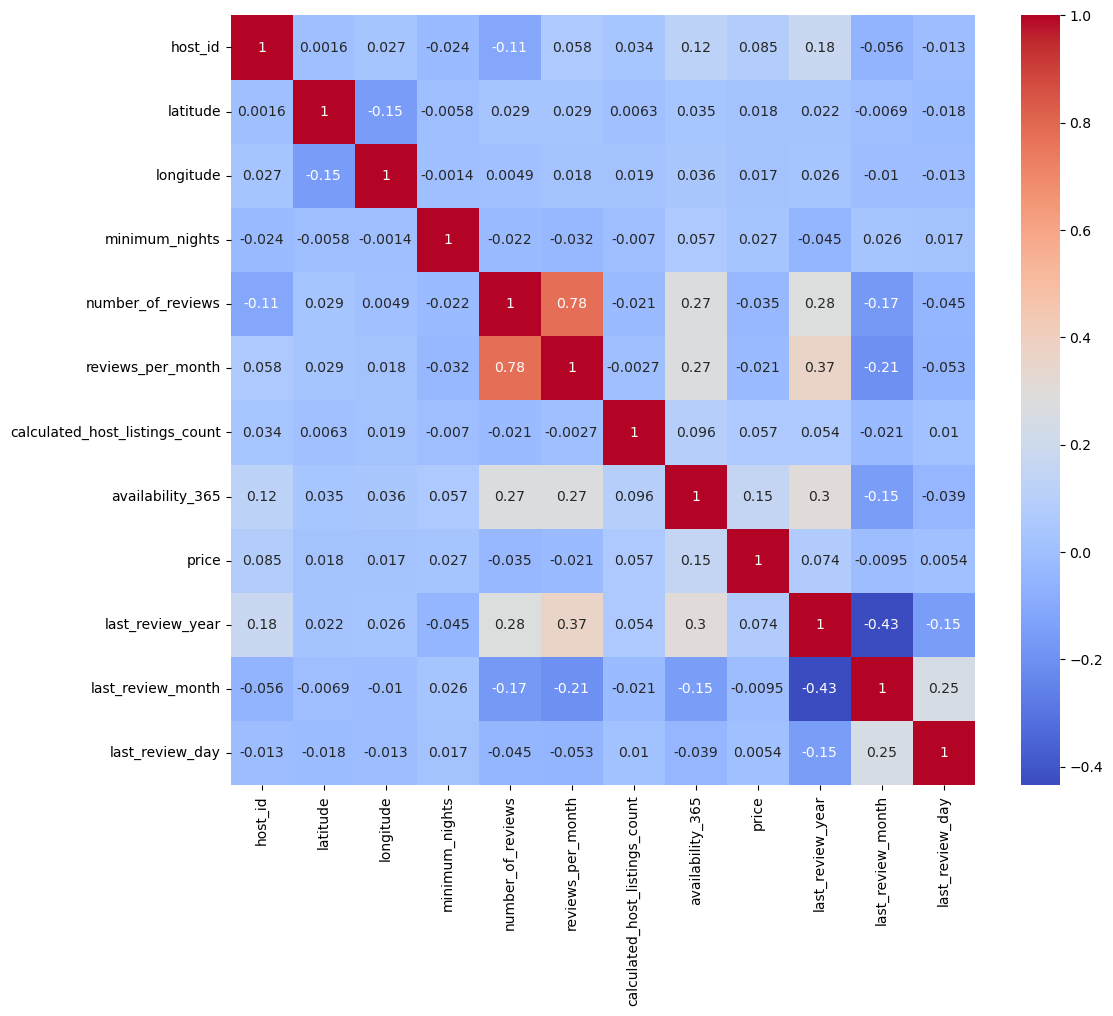

In [12]:
#correlation of numerical features
plt.figure(figsize=(12,10))
sns.heatmap(df[numerical].corr(),annot=True,cmap='coolwarm')

In [13]:
df[numerical].corr()['price']

host_id                           0.084512
latitude                          0.017697
longitude                         0.016718
minimum_nights                    0.026569
number_of_reviews                -0.035141
reviews_per_month                -0.021009
calculated_host_listings_count    0.057314
availability_365                  0.153993
price                             1.000000
last_review_year                  0.073964
last_review_month                -0.009522
last_review_day                   0.005367
Name: price, dtype: float64

In [14]:
px.density_heatmap(data_frame=df[numerical].corr(),text_auto=True)

/home/kranthi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



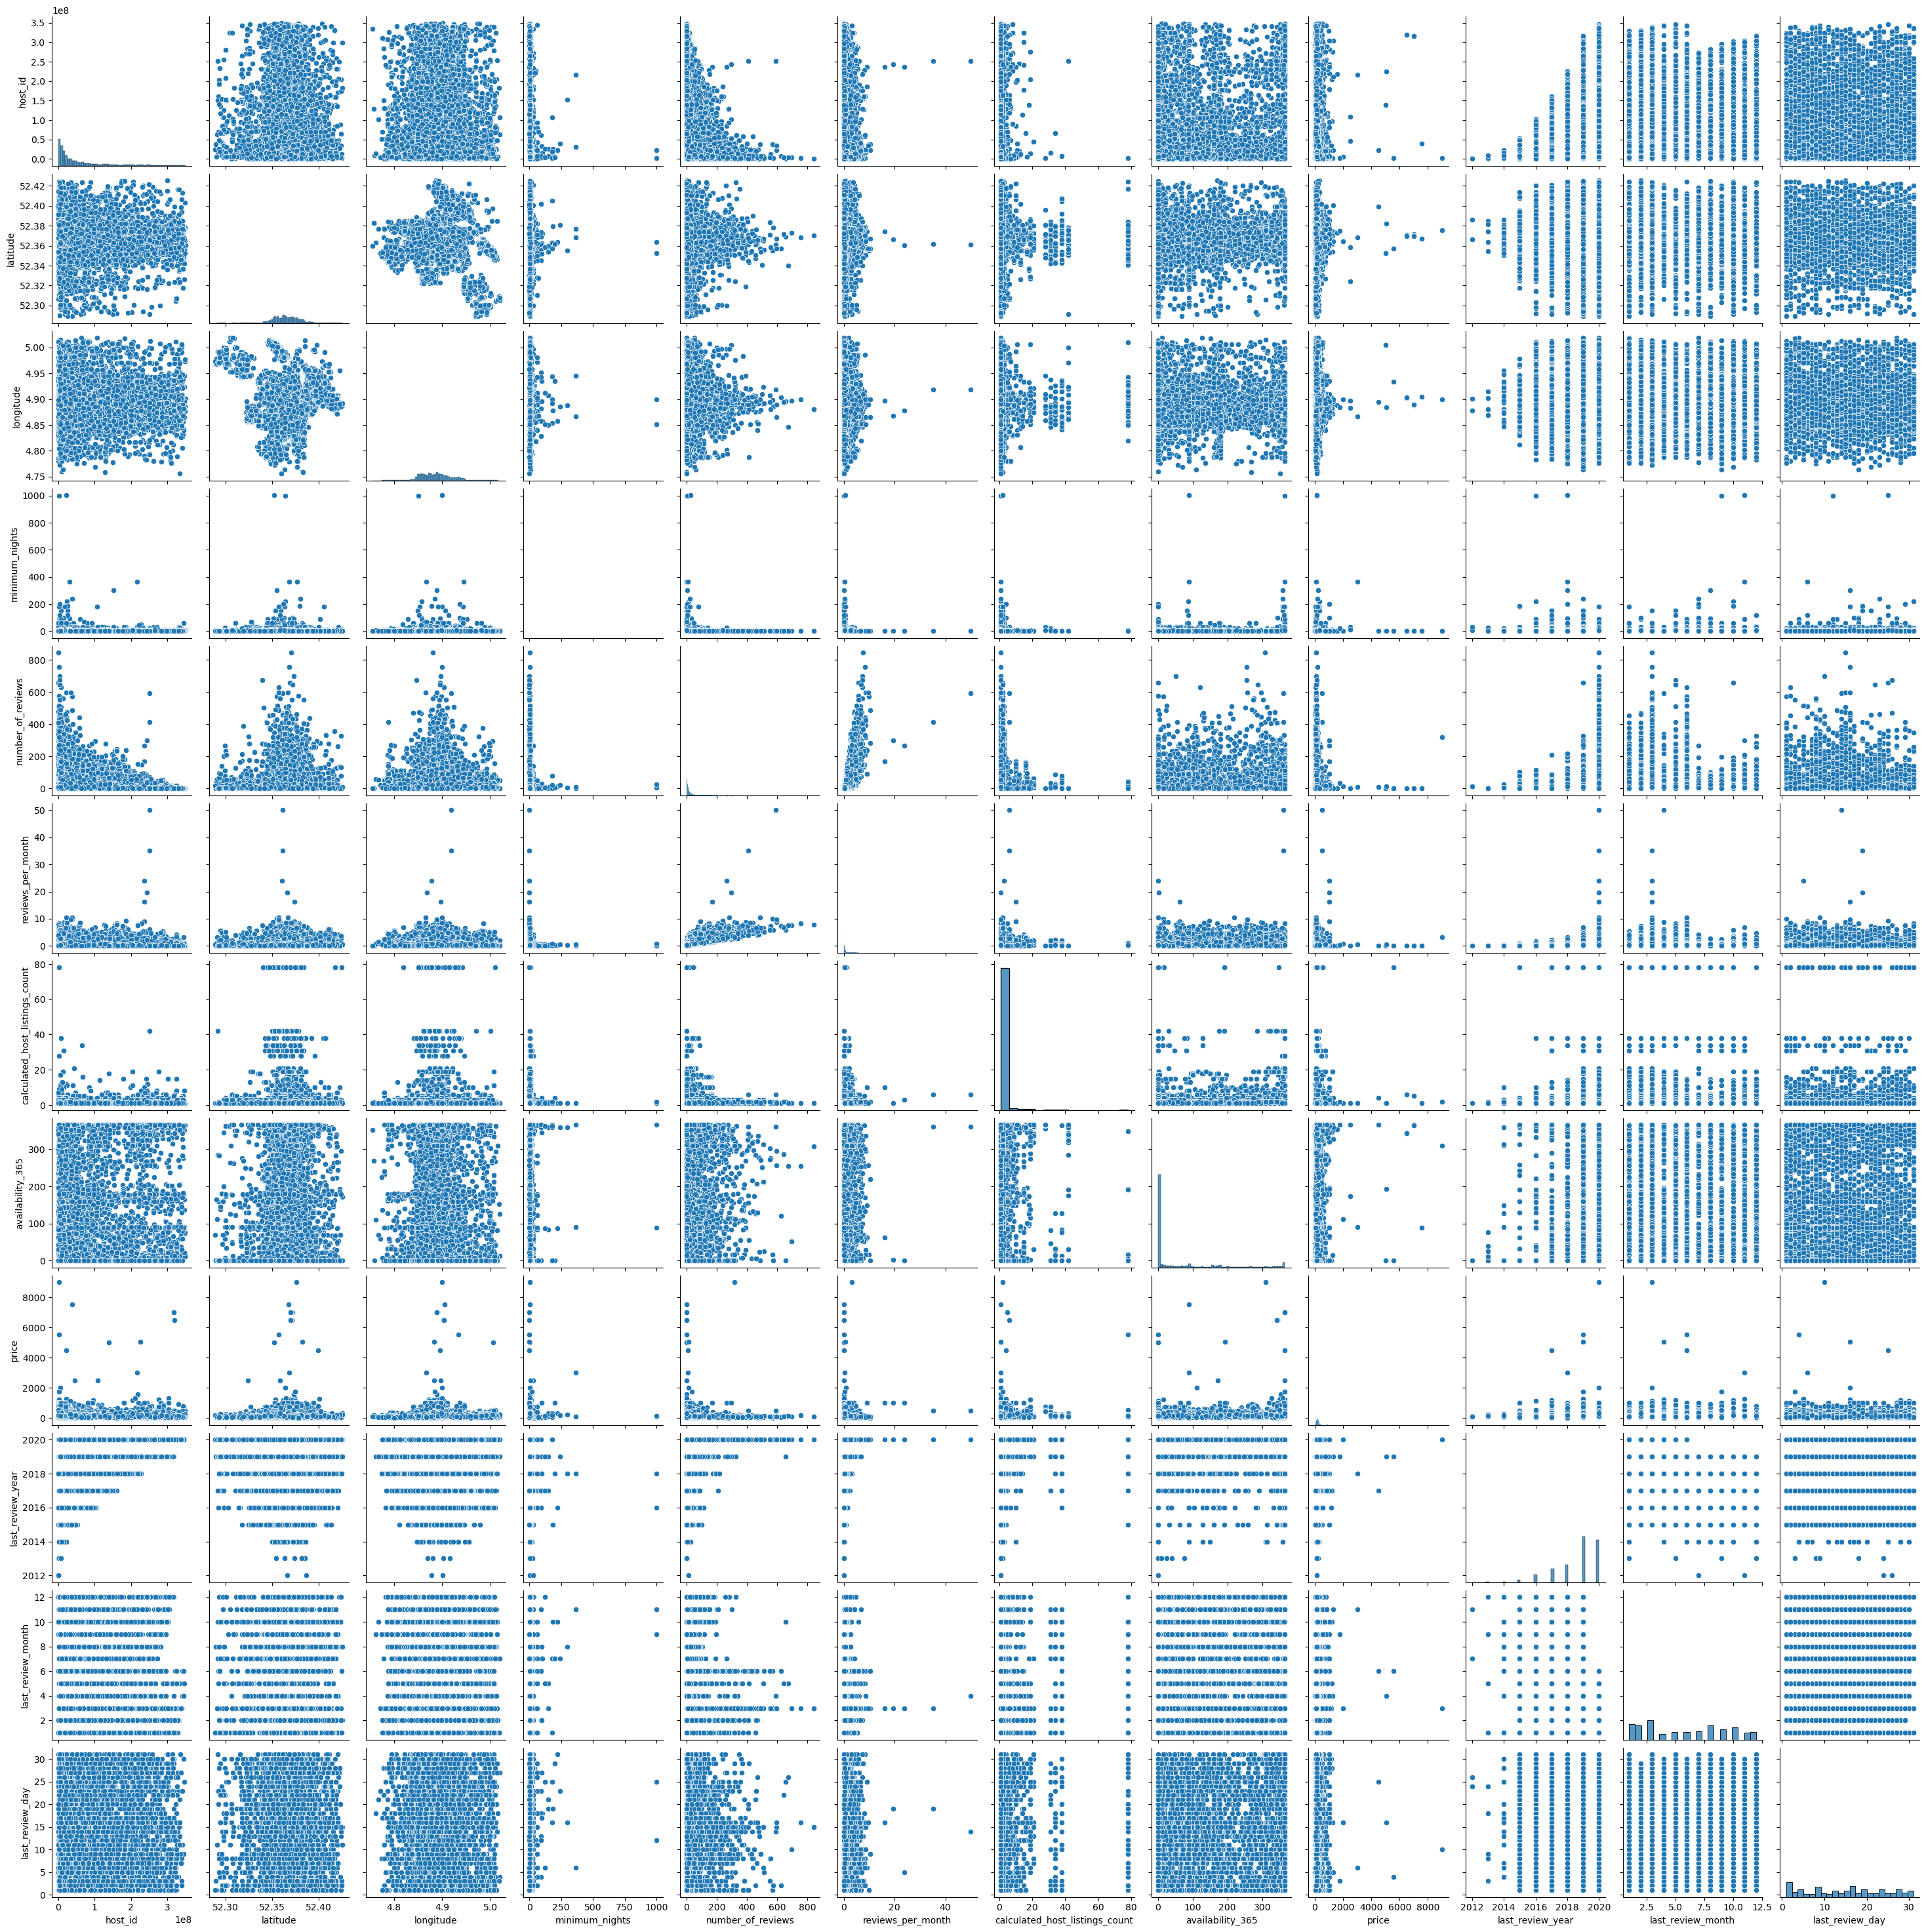

In [15]:
sns.pairplot(df[numerical],kind='scatter')

In [16]:
px.scatter(data_frame=df,x='availability_365',y='number_of_reviews')

<Axes: xlabel='calculated_host_listings_count', ylabel='price'>

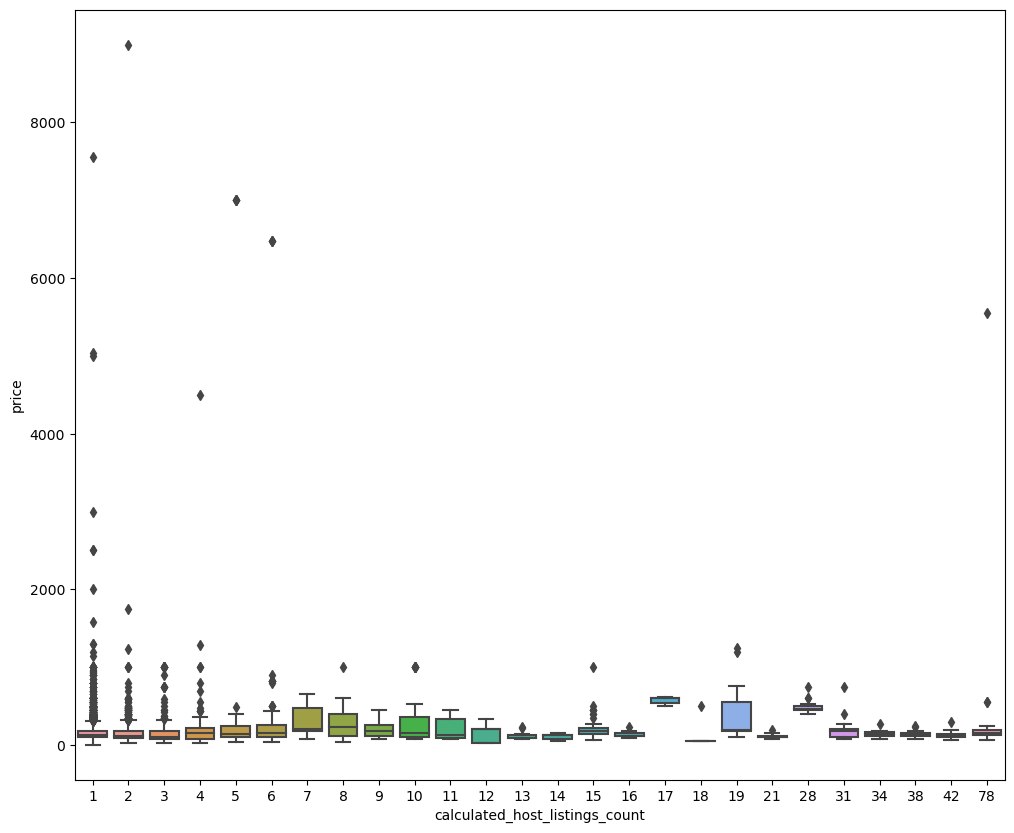

In [17]:
plt.figure(figsize=(12,10))
sns.boxplot(x=df['calculated_host_listings_count'],y=df['price'])

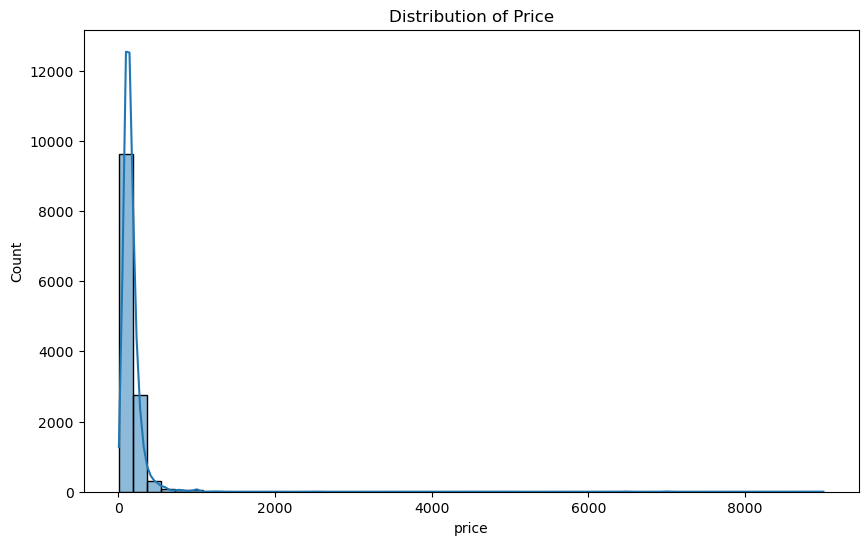

In [18]:
# Visualize the distribution of the target variable 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.show()

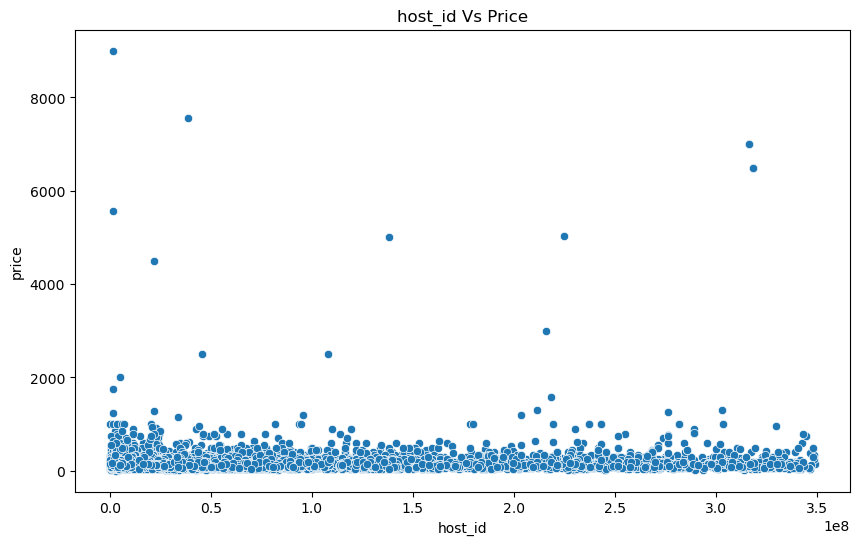

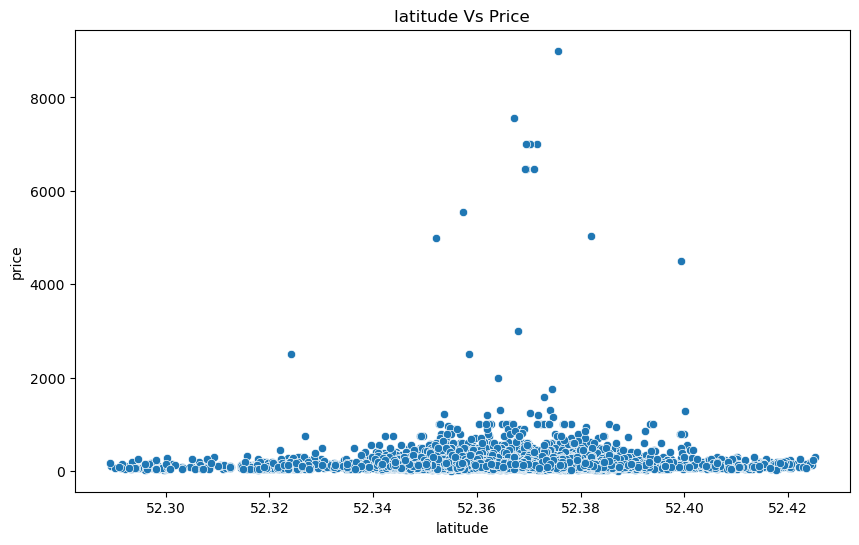

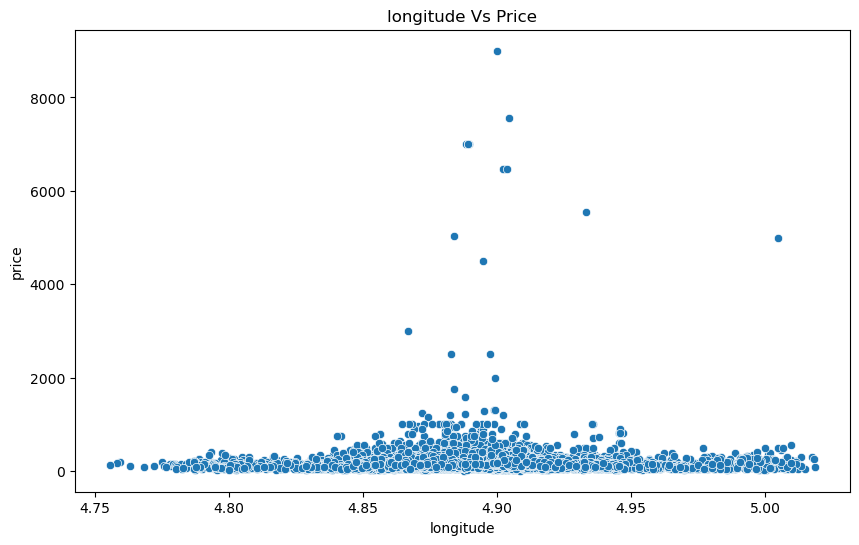

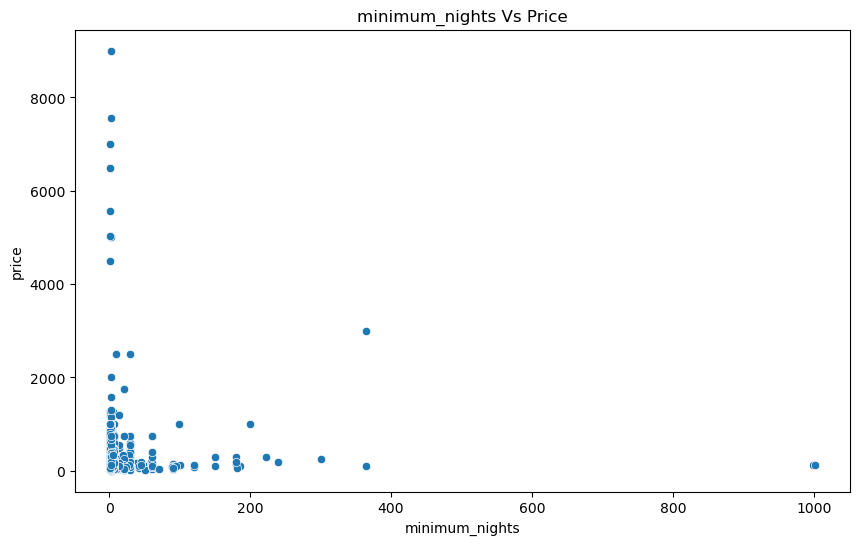

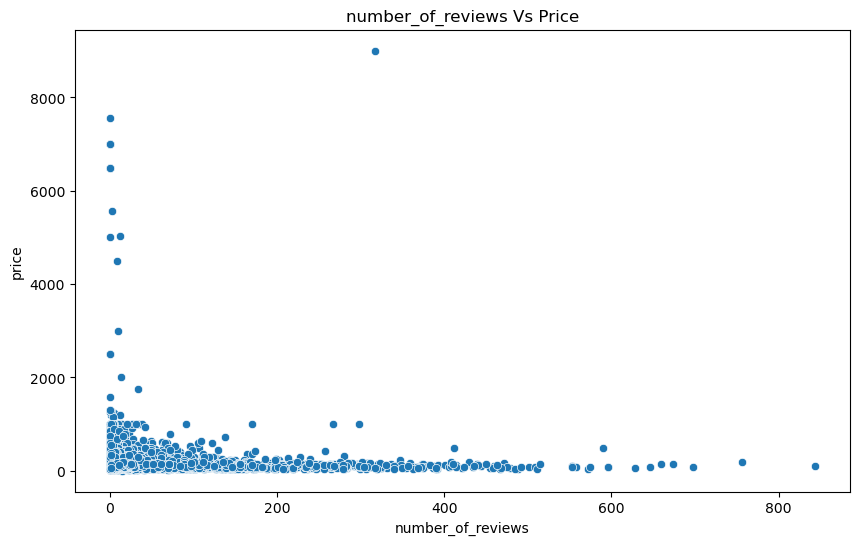

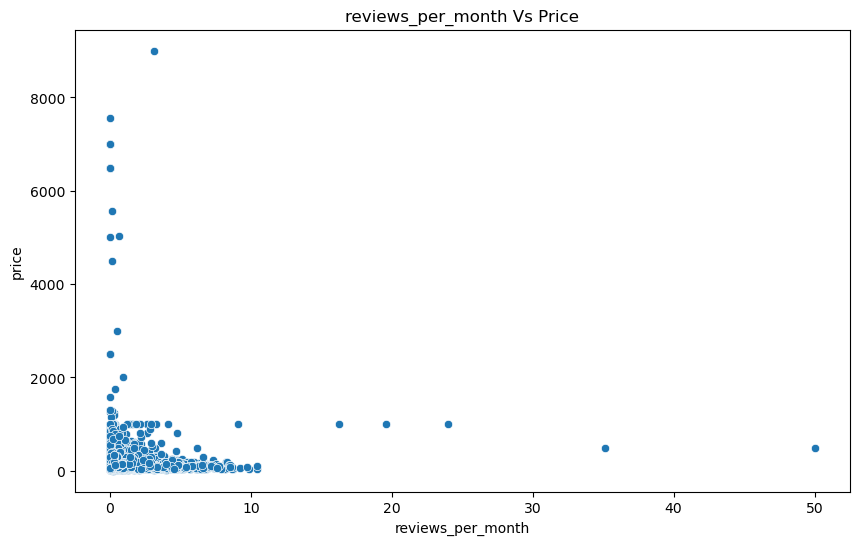

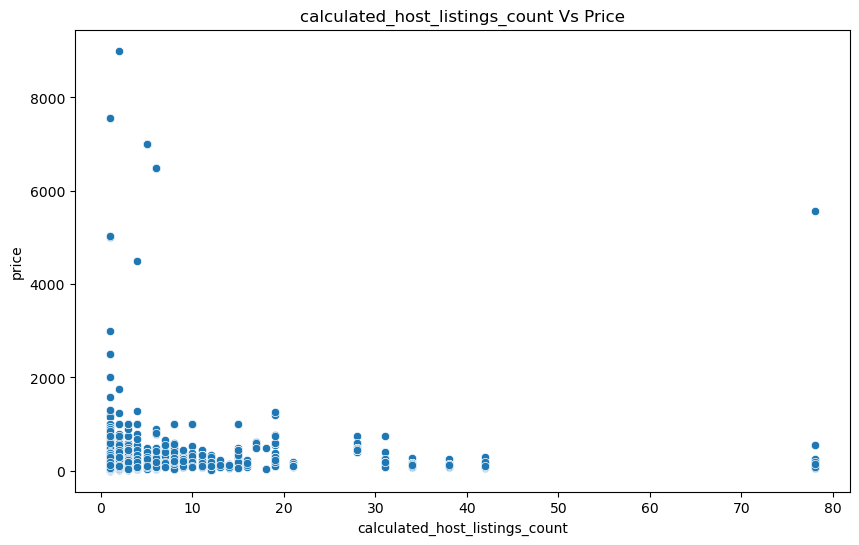

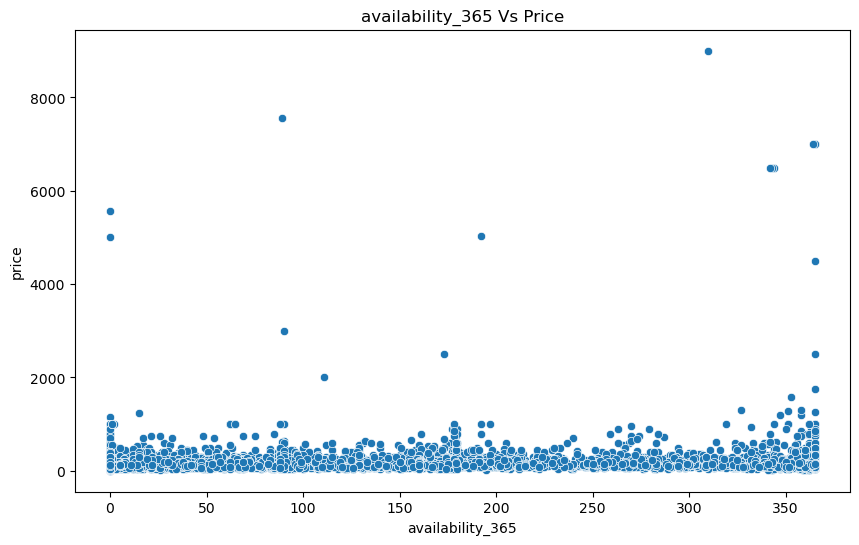

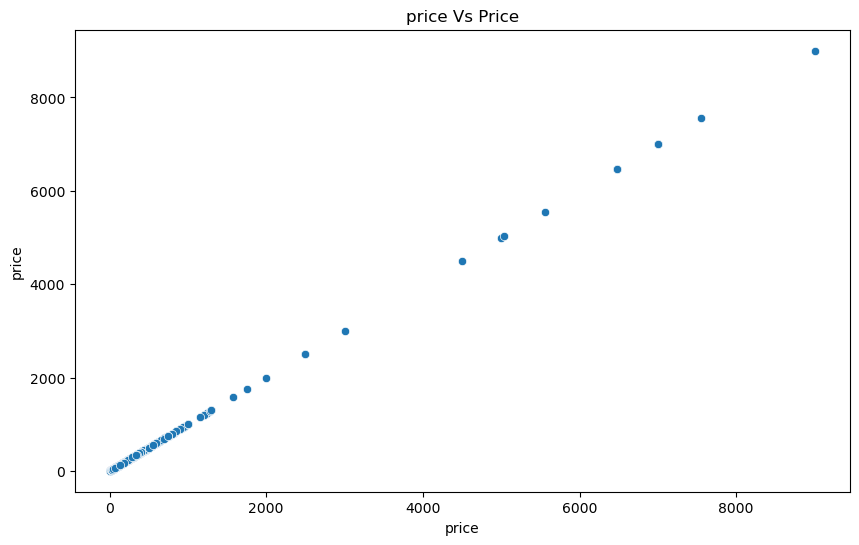

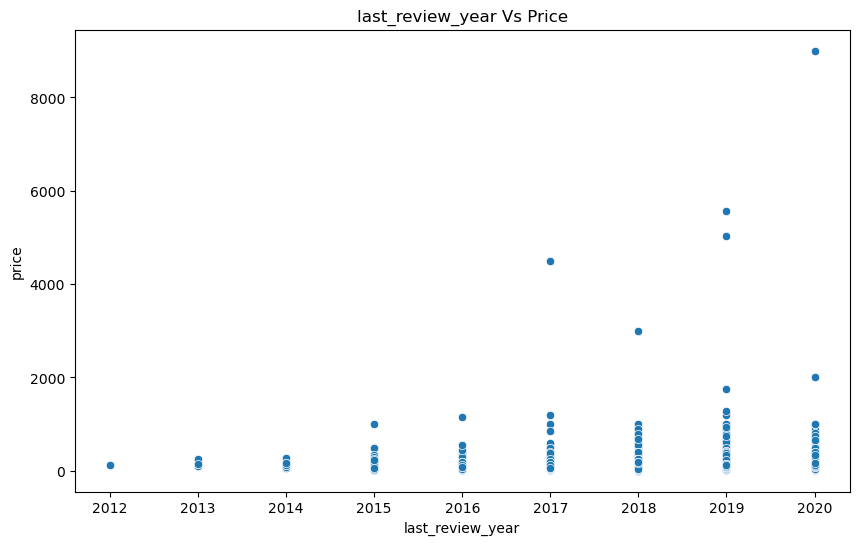

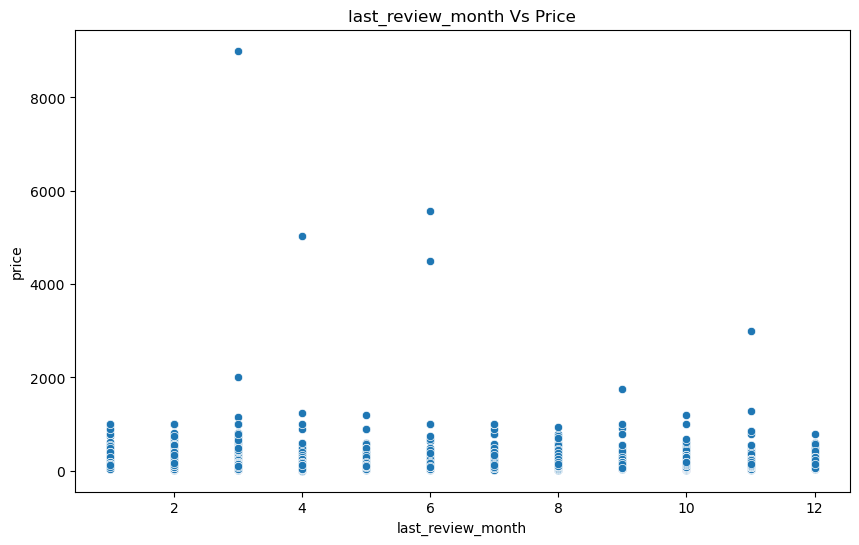

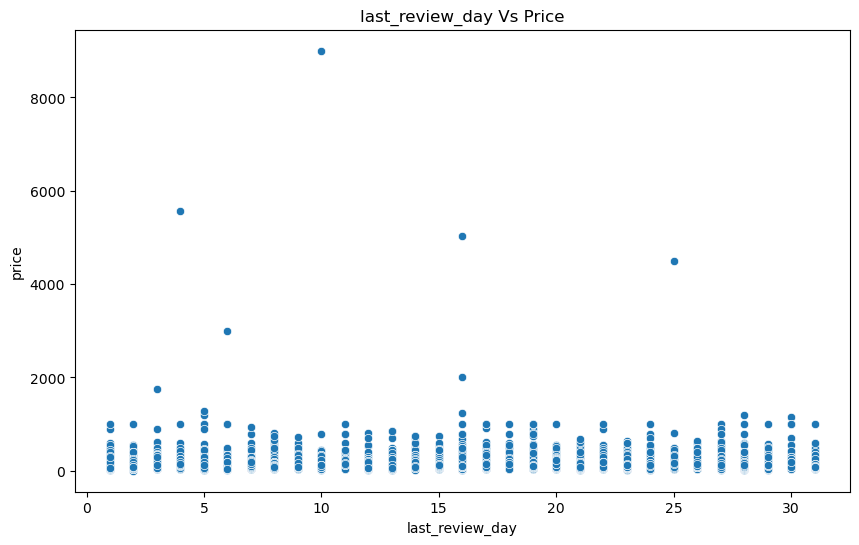

In [19]:
for feature in numerical:
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df, x=feature, y='price')
    plt.title(f'{feature} Vs Price')
    plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for feature in categorical:
    en = LabelEncoder()
    print(f'{df[feature].name}')
    df[feature] = en.fit_transform(df[feature])
    label_encoders[feature] = en

name
host_name
neighbourhood
room_type


In [21]:
print(df.dtypes)

name                                int64
host_id                             int64
host_name                           int64
neighbourhood                       int64
latitude                          float64
longitude                         float64
room_type                           int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
price                               int64
last_review_year                  float64
last_review_month                 float64
last_review_day                   float64
dtype: object


In [22]:
from sklearn.impute import SimpleImputer
# Impute missing values for numerical columns if necessary (although there's no missing data for numerical columns in this dataset)
imputer = SimpleImputer(strategy='mean')
df[numerical] = imputer.fit_transform(df[numerical])

In [23]:
from sklearn.preprocessing import StandardScaler
# Scale numerical features
scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])


In [24]:
X = df.drop(['price'],axis=1)
y = df['price']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
X_train.shape, X_test.shape

((9030, 15), (3871, 15))

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Define the model
model = RandomForestRegressor(random_state=42)


In [28]:
# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [29]:
y_pred = model.predict(X_test)

In [30]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error

print(f'r2_score : {r2_score(y_test, y_pred)}')
print(f'mean_absolute_percentage_error : {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'mean_absolute_error : {mean_absolute_error(y_test, y_pred)}')

r2_score : 0.15330703275107804
mean_absolute_percentage_error : 1.9860505041678087
mean_absolute_error : 0.28549594943202483
